In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

</br>

### 코드 2-2 신경망 구조



In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


</br>

### 코드 2-3 compile 단계

In [8]:
network.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

</br>

### 코드 2-4 image data 준비 (스케일 조정)

In [14]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255


test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

</br>

### 코드 2-5 label 준비

: training data의 개수가 n이고, class의 개수가 k 일때, '**to_categorical**' 함수는 입력받은 (n) 크기의 1차원 정수 배열을 (n, k) 크기의 2차원 배열로 변경한다.

이 배열의 두 번째 차원의 index가 class 값을 의미한다.

예를 들어 to_categorical([0, 2])는 [[1, 0, 0], [0, 0, 1]] 을 반환한다.

In [18]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
train_labels.shape

(60000, 10)

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2553 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1026 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0670 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0490 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0375 - acc: 0.9887


In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0692 - acc: 0.9792


In [23]:
print("test_accuracy : ", test_acc)
print("test_loss : ", test_loss)

test_accuracy :  0.9792
test_loss :  0.06916093814568594


</br>

### 코드 2-6 image 출력하기 

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

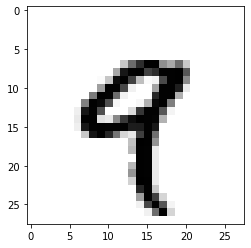

In [2]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [4]:
my_slice = train_images[10:100, :, :]

my_slice.shape

(90, 28, 28)

In [5]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [9]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

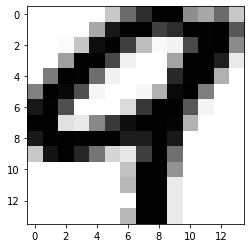

In [11]:
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

</br>

### 코드 2-4 image data 준비 (스케일 조정)